In [1]:
import os
import sys

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.append('..')
import data
import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
params = utils.yaml_to_dict('../config.yml')
params['data_dir_images'] = os.path.join('..', params['data_dir_images'])
params['data_dir'] = os.path.join('..', params['data_dir'])

In [3]:
train_ds = data._sources(params=params, mode='training')
train_ds[:5]

[('..\\dataset\\Images\\n02090622-borzoi/n02090622_7069.jpg', 19),
 ('..\\dataset\\Images\\n02112137-chow/n02112137_11732.jpg', 109),
 ('..\\dataset\\Images\\n02116738-African_hunting_dog/n02116738_9282.jpg',
  120),
 ('..\\dataset\\Images\\n02104029-kuvasz/n02104029_4571.jpg', 72),
 ('..\\dataset\\Images\\n02106662-German_shepherd/n02106662_26549.jpg', 85)]

In [4]:
data_input_fn = data.input_fn(train_ds, train=True, params=params)

In [5]:
data_input_fn

({'image': <tf.Tensor 'IteratorGetNext:0' shape=(?, 224, 224, 3) dtype=uint8>},
 <tf.Tensor 'IteratorGetNext:1' shape=(?,) dtype=int32>)

In [6]:
with tf.Session() as sess:
    elements = sess.run(data_input_fn)

In [7]:
id_label_map = utils.load_id_label_map(params)

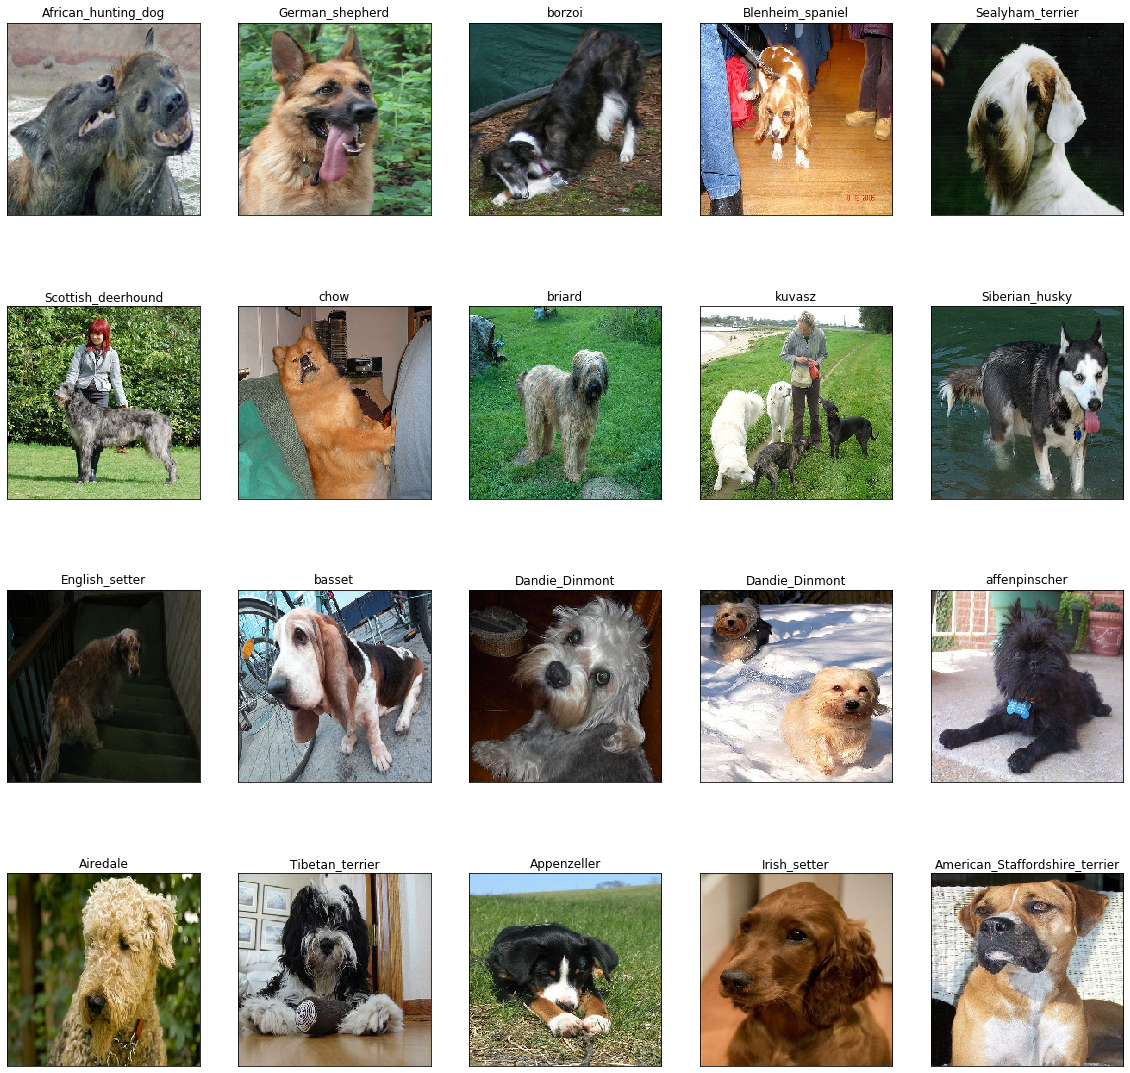

In [8]:
fig, axis = plt.subplots(4,5, figsize=(20,20))
k = 0
for i in range(4):
    for j in range(5):
        img = np.uint8(elements[0]['image'][k])
        title = id_label_map[elements[1][k]]
        axis[i][j].set_title(title)
        axis[i][j].imshow(img)
        axis[i][j].get_xaxis().set_visible(False)
        axis[i][j].get_yaxis().set_visible(False)
        k += 1
plt.show()